We will work with the following family of functions
\begin{align}
T_{\alpha,\beta}(x)=T(x,\alpha,\beta)&=\beta - (1+\beta)|x|^{\alpha},
\end{align}
where $\alpha\geq 1$, $\beta\in (-1,1]$ and $x\in [-1,1]$.
We will study the random dynamical system the family with Gaussian additive noise with variance $\sigma$ i.e
\begin{align*}
    X_{n+1}=\tau(T_{\alpha,\beta}(X_n)+\Omega_{\sigma}(n))
\end{align*}
where $\Omega_{\sigma}(n)$ are random variables i.i.d with Gaussian distribution and $\tau:\mathbb{R}\rightarrow [-1,1]$ boundary condition map $\tau(x)=\lfloor x \rfloor-1$, is the representative in $[0.2)$ of $x$ with repect to $x \sim y$ if $x-y=2k$, $k\in \mathbb{Z}$.
We want computing rigorously the Lyapunov exponent for these random dynamical systems
\begin{align*}
	\lambda(\alpha,\beta,\sigma)=\int _{-1}^{1}\ln |T'_{\alpha,\beta}|f_{\sigma}dm,
\end{align*}
where $T'_{\alpha,\beta}(x)=-\alpha (1+\beta)|x|^{\alpha-2}x$.

In [1]:
import Pkg;
Pkg.activate(".");
#Pkg.add("Symbolics")
#Pkg.add("RigorousInvariantMeasures")
#Pkg.add("BallArithmetic")
#Pkg.add("IntervalArithmetic")
Pkg.add("Plots")


  Activating project at `c:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src`
   Resolving package versions...
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Project.toml`
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Manifest.toml`


In [2]:
Pkg.update()

    Updating registry at `C:\Users\charl\.julia\registries\General.toml`
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Project.toml`
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Manifest.toml`


In [3]:
using RigorousInvariantMeasures, IntervalArithmetic, BallArithmetic
α = 3.5
β = 1
K = 128
FFTNx = 1024
B = FourierAdjoint(K, FFTNx)                           #builds a Fourier basis truncating at frecuence K (obs aqui faz a transformada no intervalo [0,1]) (i.e. usando fft hallar hallar una base de 2*K+1 elementos, esta base usará para combertir el operador de tranferencia en una matriz)

function T_alpha_beta_zeroone(α, β, x)                #definido en el intervalo  [-1,1]
    return β - (1 + β) * abs(x)^α
end

function τ_1(x)       # de [-1,1] a [0,1]
    return (x + 1) / 2
end

function τ_2(x)       # de [0,1] a [-1,1]
    return 2 * x - 1
end

T_zeroone(x) = T_alpha_beta_zeroone(α, β, x)   #aqui define a função dependendo só de x, pois ja deu valores para α,β
T(x) = τ_1(T_zeroone(τ_2(x)))             #el programa toma un intervalo [0,1] y lo parte, pero yo quiero mi dinamica en [-1,1] por so tomo τ_2 primero para que me convierte [0,1] para [-1,1] de ahi mi aplicación hacer lo que tiene que hacer y luego lo vueldo al intervalo [0,1] con τ_1

┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic C:\Users\charl\.julia\packages\BallArithmetic\aiclr\src\BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 4 threads
└ @ BallArithmetic C:\Users\charl\.julia\packages\BallArithmetic\aiclr\src\BallArithmetic.jl:27
┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures C:\Users\charl\.julia\packages\RigorousInvariantMeasures\0z5dS\src\Basis\Fourier\FourierAdjoint.jl:21


Generating forwards to C:\Users\charl\.julia\artifacts\0c078564d4210d6385e014f8d3adf9285c4901af\bin\libopenblas64_.dll (clear: 0, verbose: 1, suffix_hint: '(null)')
 -> Autodetected symbol suffix "64_"
 -> Autodetected interface ILP64 (64-bit)
 -> Autodetected argument-passing complex return style
 -> Autodetected gfortran calling convention
 -> CBLAS detected
 - [2732] complex(cdotc_64_)
 - [2733] complex(cdotu_64_)
 - [4439] complex(zdotc_64_)
 - [4440] complex(zdotu_64_)
Processed 4949 symbols; forwarded 4860 symbols with 64-bit interface and mangling to a suffix of "64_"


T (generic function with 1 method)

We will use the following approximation to find the value of the lyaponov exponent $λ(\alpha,\beta,σ)$.
Let $\alpha$ and $\beta$ be fixed, then
\begin{align*}
	|\lambda(\alpha,\beta,\sigma)-\lambda(\alpha,\beta,\sigma,k,s)|\leq \Upsilon \|f_{\sigma}-f_{\sigma,k,s}\|_{L^2}.
\end{align*}
where $f_{\sigma,k,s}$ is the symmetric fixed point and $\Upsilon = \sqrt{2}((\ln((1+\beta)\alpha)-(\alpha-1))^2+(\alpha-1)^2)^{\frac{1}{2}}$.

In [4]:
Υ = sqrt(2) * ((log2((β + 1) * α) - (α - 1))^2 + (α - 1)^2)^(1 / 2)

3.5621530141511433

To calculate $\lambda(\alpha,\beta,\sigma,k,s)$ we need $f_{\sigma,k,s}$ and therefore $f_{\sigma,k}$.

In [5]:
using LinearAlgebra
# D é a matri que vai multiplicar a matriz do operador de tranferencia P para obter a matriz do operador de tranferecia com ruido (obs que D ja está trucanda)

σ = 0.1
D = Diagonal([[exp((-σ^2 * π^2 * interval(k)^2) / 2) for k in 0:K]; [exp((-σ^2 * π^2 * interval(k)^2) / 2) for k in -K:-1]])
Dc, Dr = IntervalArithmetic.mid.(D), IntervalArithmetic.radius.(D)
bD = BallMatrix(Dc, Dr)

257×257 BallMatrix{Float64, Float64, Ball{Float64, Float64}, Diagonal{Float64, Vector{Float64}}, Diagonal{Float64, Vector{Float64}}}:
 1.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
                                ⋮  ⋱  
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0     0.95185 ± 1.11022e-16

$P\sigma K$ is the finite transfer matrix

In [6]:
PK = assemble(B, T)        #aqui esta calculando el operador de transferencia finito de T, note que usa a matriz B que é a que converte o operador numa matriz na base de fourier                   #matriz de tranferencia com ruido y es finito, está en la base de Fourier

┌ Info: 257
└ @ RigorousInvariantMeasures C:\Users\charl\.julia\packages\RigorousInvariantMeasures\0z5dS\src\Basis\Fourier\FourierCommon.jl:74
┌ Info: 128
└ @ RigorousInvariantMeasures C:\Users\charl\.julia\packages\RigorousInvariantMeasures\0z5dS\src\Basis\Fourier\FourierCommon.jl:78
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


257×257 adjoint(::Matrix{Complex{Interval{Float64}}}) with eltype Complex{Interval{Float64}}:
             [0.999999, 1.00001] + [-1.47812e-14, 1.47812e-14]im  …         [-1.47812e-14, 1.47812e-14] + [-1.47812e-14, 1.47812e-14]im
               [0.474773, 0.474774] + [0.186617, 0.186618]im         [-0.375593, -0.375592] + [-0.0188692, -0.0188691]im
               [0.392084, 0.392085] + [0.166867, 0.166868]im         [-0.340098, -0.340097] + [-0.0599438, -0.0599437]im
               [0.349747, 0.349748] + [0.153616, 0.153617]im          [-0.31428, -0.314279] + [-0.0732259, -0.0732258]im
               [0.322351, 0.322352] + [0.144072, 0.144073]im          [-0.295305, -0.295304] + [-0.078874, -0.0788739]im
               [0.302536, 0.302537] + [0.136744, 0.136745]im      …  [-0.280603, -0.280602] + [-0.0815037, -0.0815036]im
               [0.287232, 0.287233] + [0.130862, 0.130863]im          [-0.26874, -0.268739] + [-0.0827021, -0.082702]im
               [0.274888, 0.274889] + [0.1259

In [7]:
center = IntervalArithmetic.mid.(real.(PK)) + im * IntervalArithmetic.mid.(imag.(PK))
radius = sqrt.(IntervalArithmetic.radius.(real.(PK)) .^ 2 + IntervalArithmetic.radius.(imag.(PK)) .^ 2)

bPK = BallMatrix(center, radius)

257×257 Matrix{Ball{Float64, ComplexF64}}:
           1.0+0.0im ± 2.09716e-14  …              0.0+0.0im ± 2.09038e-14
 0.474773+0.186618im ± 2.20598e-14     -0.375593-0.0188691im ± 2.20426e-14
 0.392084+0.166868im ± 2.30804e-14     -0.340098-0.0599438im ± 2.30755e-14
 0.349748+0.153617im ± 2.45719e-14     -0.314279-0.0732258im ± 2.45621e-14
    0.322352+0.144072im ± 2.52e-14     -0.295304-0.0788739im ± 2.51902e-14
 0.302537+0.136745im ± 2.57299e-14  …  -0.280603-0.0815036im ± 2.57201e-14
 0.287233+0.130862im ± 2.81047e-14       -0.26874-0.082702im ± 2.81047e-14
 0.274888+0.125987im ± 2.88701e-14     -0.258872-0.0831447im ± 2.88701e-14
 0.264619+0.121847im ± 2.93607e-14     -0.250472-0.0831604im ± 2.93607e-14
 0.255876+0.118267im ± 2.98906e-14      -0.243193-0.0829243im ± 2.9871e-14
                                                           ⋮  ⋱  
 0.255876-0.118267im ± 2.98906e-14      -0.243193+0.0829243im ± 2.9871e-14
 0.264619-0.121847im ± 2.93607e-14     -0.250472+0.0831604im ± 2.9

In [8]:
PσK = bD * bPK

257×257 Matrix{Ball{Float64, ComplexF64}}:
               1.0+0.0im ± 7.84812e-14  …                 0.0+0.0im ± 2.09038e-14
     0.451913+0.177632im ± 4.89792e-14        -0.357508-0.0179606im ± 4.16091e-14
      0.32185+0.136976im ± 3.91092e-14          -0.279175-0.049206im ± 3.5283e-14
    0.224321+0.0985269im ± 2.98925e-14        -0.201573-0.0469656im ± 2.76924e-14
     0.146361+0.0654147im ± 2.0681e-14          -0.13408-0.035812im ± 1.94355e-14
   0.0881025+0.0398218im ± 1.30716e-14  …    -0.0817152-0.0237349im ± 1.23999e-14
   0.0486068+0.0221451im ± 7.83656e-15       -0.0454773-0.0139952im ± 7.50023e-15
   0.0244911+0.0112248im ± 4.12993e-15      -0.0230642-0.00740777im ± 3.97287e-15
  0.0112461+0.00517839im ± 1.96185e-15      -0.0106448-0.00353424im ± 1.89467e-15
 0.00469973+0.00217223im ± 8.48716e-16     -0.00446677-0.00152309im ± 8.21834e-16
                                                               ⋮  ⋱  
 0.00469973-0.00217223im ± 8.48716e-16     -0.00446677+0.00152309im

To calculate the fixed point of the complex matrix of intervals $P\sigma K$, we will define the complex matrix A as follows
$$(A)_{ij}=mid(real(P_{ij}))+mid(im(P_{ij}))$$
where $mid$ takes the mid point of the interval. Now we are going to calculate the fixed point of the matrix A.

In [9]:
using LinearAlgebra
#A=zeros(2*K+1,2*K+1)+im*zeros(2*K+1,2*K+1)# creo esta matriz de (2k+1)x(2k+1) ára despues llenarlos con los valores de PσK pero como cada elemento de esa matriz es un intervalo lo que voy hacer es tomar el punto medio de ese intervalo asi la matriz A va ser una matriz de numero reales, y asi podre usar el comando eigen
A = PσK.c #Como PσK es una matriz de intervalos, aqui toma el punto medio de cada intervalo para luego hallar el punto dijo de ese que va ser proximo al punto dijo de la matriz de intervalos
F = eigen(A)                              # eigen es para hallar los auto valores y auto vetores de A, como el ultimo auto valor es 1, entonces el auto vector associado a él es el punto fijo de A

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
257-element Vector{ComplexF64}:
     -0.4900231549726225 + 8.326672684688674e-17im
    -0.02402858317991282 - 0.14996656065810005im
   -0.024028583179910416 + 0.14996656065810154im
   -0.000761676865358095 + 8.51695890459111e-12im
  -5.2749393860684646e-5 - 8.832489874756321e-11im
  -1.7735377836480526e-6 + 3.4465294470351207e-9im
   -5.667927747685051e-8 + 1.6229019765952686e-7im
   -4.207868657866522e-8 - 1.5945261186513397e-7im
   -6.766522752435406e-9 + 2.0575951172047054e-10im
 -3.8938768088640203e-10 - 6.603587979647713e-11im
                         ⋮
  2.1784674215321801e-10 - 7.286478180283278e-10im
   4.6304790245366975e-7 - 6.70350362353933e-8im
    6.015544956206408e-7 + 6.069990012261582e-8im
   2.7585769581627734e-5 + 1.863179574945769e-11im
  0.00044984875102503424 + 2.781066828790387e-12im
   0.0005242102857195528 - 0.00838080586207527im
   0.0005242102858962801 + 0.00838080586254848im
     0.

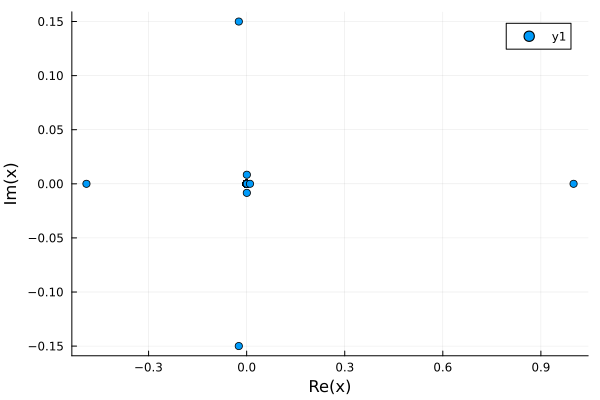

In [10]:
using Plots
scatter(F.values)

In [11]:
F.vectors               #cada columna es un auto vector del los autovalores de arriba, como 1 es el autovalor que quiero y es el ultimo, la ultima columna es al auto vector que necesito

257×257 Matrix{ComplexF64}:
         0.0+0.0im         …    0.862162+0.0im
   -0.159681+0.542837im         0.259411+0.000287363im
  -0.0017452+0.325432im         0.174787+0.0509537im
  0.00513528+0.215068im         0.122907+0.0413455im
  0.00674515+0.136196im         0.080324+0.0293197im
  0.00543371+0.0804888im   …   0.0483626+0.0185373im
  0.00354405+0.0438388im       0.0266803+0.0105686im
  0.00199581+0.0218772im       0.0134412+0.00545314im
 0.000993121+0.00997038im     0.00617095+0.0025498im
 0.000441255+0.0041413im      0.00257838+0.00108097im
            ⋮              ⋱  
  0.00384845+0.00159201im     0.00257838-0.00108097im
  0.00928487+0.00376644im     0.00617095-0.0025498im
   0.0204248+0.00808853im  …   0.0134412-0.00545314im
   0.0410568+0.0157715im       0.0266803-0.0105686im
   0.0756839+0.0279271im       0.0483626-0.0185373im
    0.128757+0.0449061im        0.080324-0.0293197im
    0.204878+0.0656197im        0.122907-0.0413455im
    0.312697+0.0901638im   …    0.174787

In [12]:
fσK = F.vectors[:, 257]              #este es el auto vector, meu ponto fixo

257-element Vector{ComplexF64}:
    0.8621618559192298 + 0.0im
    0.2594113222656273 + 0.0002873628398487522im
    0.1747872046560136 + 0.05095373174067655im
   0.12290673960817548 + 0.04134552726635238im
   0.08032399031782754 + 0.02931969280076521im
   0.04836263817291537 + 0.018537268315635905im
   0.02668034785187105 + 0.01056856435304618im
   0.01344119393518667 + 0.005453135414808818im
 0.0061709526717366224 + 0.002549801279743558im
  0.002578379746454184 + 0.0010809684527433644im
                       ⋮
  0.002578379746454213 - 0.001080968452743335im
  0.006170952671736606 - 0.002549801279743532im
  0.013441193935186715 - 0.005453135414808853im
  0.026680347851871032 - 0.010568564353046171im
  0.048362638172915216 - 0.01853726831563613im
   0.08032399031782755 - 0.029319692800765393im
   0.12290673960817552 - 0.04134552726635241im
   0.17478720465601363 - 0.050953731740676425im
   0.25941132226562713 - 0.0002873628398489099im

$f_{\sigma,k}$ is fixed point of $A$

In [13]:
fσK /= fσK[1]# a primeira entrada tem que ser 1, normalizo todo

257-element Vector{ComplexF64}:
    0.9999999999999999 + 0.0im
    0.3008847126379131 + 0.0003333049796576402im
   0.20273131252096155 + 0.05909996062902841im
   0.14255645707862283 + 0.04795564427084299im
   0.09316578988777782 + 0.03400717927784545im
   0.05609461592493155 + 0.021500914460976267im
  0.030945869002085093 + 0.012258213791861696im
  0.015590105086307466 + 0.0063249555490885526im
  0.007157533854425981 + 0.0029574508107007135im
  0.002990598260352329 + 0.0012537883058986003im
                       ⋮
 0.0029905982603523626 - 0.0012537883058985665im
  0.007157533854425962 - 0.0029574508107006836im
  0.015590105086307518 - 0.0063249555490885925im
  0.030945869002085073 - 0.012258213791861686im
   0.05609461592493137 - 0.021500914460976527im
   0.09316578988777784 - 0.03400717927784567im
   0.14255645707862288 - 0.047955644270843034im
   0.20273131252096158 - 0.05909996062902827im
    0.3008847126379129 - 0.0003333049796578231im

In the computer calculations, the symmetry of the point was lost. Now let's symmetrize the fixed point

In [14]:
#aqui estamos haciendo el punto fijo simetrico, pois en teoria tiene que se simetrico pero como estoy calculando en la computadora que aproxima numero infinitos no esta saliendo simetrico
fσKs = zeros(257) + zeros(257) * im
for i in 1:129
    fσKs[i] = fσK[i]
end

for i in 1:128
    fσKs[258-i] = conj(fσK[i+1])
end
fσKs                                #este é o ponto fixo simetrico


257-element Vector{ComplexF64}:
   0.9999999999999999 + 0.0im
   0.3008847126379131 + 0.0003333049796576402im
  0.20273131252096155 + 0.05909996062902841im
  0.14255645707862283 + 0.04795564427084299im
  0.09316578988777782 + 0.03400717927784545im
  0.05609461592493155 + 0.021500914460976267im
 0.030945869002085093 + 0.012258213791861696im
 0.015590105086307466 + 0.0063249555490885526im
 0.007157533854425981 + 0.0029574508107007135im
 0.002990598260352329 + 0.0012537883058986003im
                      ⋮
 0.002990598260352329 - 0.0012537883058986003im
 0.007157533854425981 - 0.0029574508107007135im
 0.015590105086307466 - 0.0063249555490885526im
 0.030945869002085093 - 0.012258213791861696im
  0.05609461592493155 - 0.021500914460976267im
  0.09316578988777782 - 0.03400717927784545im
  0.14255645707862283 - 0.04795564427084299im
  0.20273131252096155 - 0.05909996062902841im
   0.3008847126379131 - 0.0003333049796576402im


Note that
\begin{align*}
f_{\sigma,k,s}=(\mathcal{F}(f_{\sigma,k,s})[0],\mathcal{F}(f_{\sigma,k,s})[1],\ldots,\mathcal{F}(f_{\sigma,k,s})[K],\mathcal{F}(f_{\sigma,k,s})[-K],\ldots,\mathcal{F}(f_{\sigma,k,s})[-1])
\end{align*}


I already have bounded $|\lambda(\alpha,\beta,\sigma)-\lambda(\alpha,\beta,\sigma,k,s)|$, it remains to find $\lambda(\alpha,\beta,\sigma,k,s)$ but 
\begin{align*}
\lambda (\alpha,\beta,\sigma,k,s)&=\int_{-1}^{1}\ln|T'_{\alpha,\beta}|f_{\sigma,k,s}dm\\
&=\langle \ln|T'_{\alpha,\beta}|,f_{\sigma,k,s} \rangle\\
&=\displaystyle \sum_{j=-k}^{k}\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]\mathcal{F}(f_{\sigma,k,s})[j].
\end{align*}
$\mathcal{F}(f_{\sigma,k})[j]$ we have already calculated it, let's calculate $\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]$.

We now that

\begin{align*}
\mathcal{F}(ln|T'_{\alpha,\beta}|)[0]&=\ln (2\alpha \beta)-(\alpha-1)\\
\mathcal{F}(ln|T'_{\alpha,\beta}|)[j]&=-\frac{(\alpha-1)}{j\pi}\int_{0}^{1}\frac{1}{x}sen(j\pi x)dx\\
&=-\frac{(\alpha-1)}{j\pi}\int _{0}^{j\pi}\frac{sen(x)}{x}dx.
\end{align*}

In [15]:
bfσKs = BallVector(fσKs)

257-element Vector{Ball{Float64, ComplexF64}}:
                     0.9999999999999999 + 0.0im ± 0.0
   0.3008847126379131 + 0.0003333049796576402im ± 0.0
    0.20273131252096155 + 0.05909996062902841im ± 0.0
    0.14255645707862283 + 0.04795564427084299im ± 0.0
    0.09316578988777782 + 0.03400717927784545im ± 0.0
   0.05609461592493155 + 0.021500914460976267im ± 0.0
  0.030945869002085093 + 0.012258213791861696im ± 0.0
 0.015590105086307466 + 0.0063249555490885526im ± 0.0
 0.007157533854425981 + 0.0029574508107007135im ± 0.0
 0.002990598260352329 + 0.0012537883058986003im ± 0.0
                                                                              ⋮
 0.002990598260352329 - 0.0012537883058986003im ± 0.0
 0.007157533854425981 - 0.0029574508107007135im ± 0.0
 0.015590105086307466 - 0.0063249555490885526im ± 0.0
  0.030945869002085093 - 0.012258213791861696im ± 0.0
   0.05609461592493155 - 0.021500914460976267im ± 0.0
    0.09316578988777782 - 0.03400717927784545im ± 0.0
    0.142

In [16]:
residual = PσK * bfσKs - bfσKs

257-element Vector{Ball{Float64, ComplexF64}}:
                                         0.0 + 0.0im ± 1.729759868381298e-13
     -9.43689570931383e-16 - 9.168555671623668e-16im ± 1.674114746284664e-13
   -7.771561172376096e-16 - 5.204170427930421e-16im ± 1.3303859320959936e-13
  -5.551115123125783e-16 - 2.0816681711721685e-17im ± 1.0112910041784043e-13
    -5.689893001203927e-16 - 6.938893903907228e-17im ± 6.982209662361391e-14
    -3.469446951953614e-16 + 9.71445146547012e-17im ± 4.4028672652160167e-14
   -1.2836953722228372e-16 - 2.42861286636753e-17im ± 2.6164268094836638e-14
  -3.2959746043559335e-17 + 7.806255641895632e-17im ± 1.3739466218036232e-14
    -4.423544863740858e-17 - 1.431146867680866e-17im ± 6.516059851168323e-15
   -1.734723475976807e-17 - 3.469446951953614e-17im ± 2.8105417170214227e-15
                                                                                                     ⋮
   -1.734723475976807e-17 + 3.469446951953614e-17im ± 2.8105417170214227e-15
   

In [17]:
ϵ = norm(residual.c, 2) + norm(residual.r, 2)

3.9917963488692576e-13

In [18]:
#fσk=[fσk[1:K+1];fσk[FFTNx-K+1:FFTNx]]          #para ver esto vi ext_z desde K+1=129 hasta FFTNx-(K+1)=895 son todos zeros, en fσk no son zeros pero igual quito lo mismo que puse

In [19]:
import Pkg

In [20]:
Pkg.activate(".")
Pkg.add("TaylorModels")

  Activating project at `c:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src`
   Resolving package versions...
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Project.toml`
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Manifest.toml`


We want to compute
$$
\frac{1}{j\pi}\int_0^{j\pi} \frac{sin(t)}{t}dt
$$
for $j\geq 1$ by using Taylor Models integration for $[\pi, j\pi]$.

To make the computation more efficient, we will 
compute 
$$
I_i = \int_{i\pi}^{(i+1)\pi}\frac{sin(t)}{t}dt
$$

In [21]:
f(t) = sin(t) / t

f (generic function with 1 method)

The  power series for $f$ at $x=0$ is
$$
f(x) = \sum_{i=0}^{+\infty}(-1)^i\frac{x^{2i}}{(2i+1)!}
$$
Then, the power series for the primitive is 
$$
F(x) = \sum_{i=0}^{+\infty}(-1)^i\frac{x^{2i+1}}{(2i+1)!(2i+1)}.
$$
We are going to use this Taylor series to approximate the integral only in the interval $[0, \pi]$.

We will bound the remainder of the series by using the alternating series remainder.

In [22]:
function coeff_eval_at_0(i, x)
    return x^(2i + 1) / (factorial(big(2i + 1)) * (2i + 1))
end

coeff_eval_at_0 (generic function with 1 method)

In [23]:
using IntervalArithmetic                                #No usa aqui Taylor Model porque no existe su serie de taylor pues la serie de taylor lo hace sacando la derivada y evaluando a en nuestro caro a=0, pero nosotros tenemos sen(t)/t el cual al derivar siempre tendra dividido por t^n y no se va poder remprazar para t=0
N = 1000

Pi = @biginterval π                                     # @interval(1)=[1,1], @interval(0.1)=[0.1,0.100001], @interval(x)= um intervalo fechado pequeno que contega x, @interval(1,2)=[1,2],@biginterval(1,2)=[1,2]_256 creo que va aceptar por ejemplo un decimal hasta la cifra 256
v = [(-1)^i * coeff_eval_at_0(i, Pi) for i in 0:N]        # como ja integro agora tem que valiar em \pi e 0, em verdad seria em jπ, mas ta tomando no intervalo [0,π] de momento
# i.e esta achando (-1)^{i}a_K, e os vota emcada coordenada de v, note que cada coordenadas é um intervalo pois Pi
error = Interval(-1, 1) * abs(coeff_eval_at_0(N + 1, Pi))   # error=[-a_{K+1},a_{K+1}], esto se tiene de Alternating series estimation theorem
@info error

integral_with_error = sum(v) + error                      # aqui esta sumando os primeros (-1)a_K + error e vai me sair um inervalo
integral_with_error, diam(integral_with_error)          # o diametri do intervalo que tem que ser muito pequeno

┌ Info: [-1.16004e-4753, 1.16004e-4753]₂₅₆
└ @ Main c:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\TaylorIntegration copy 25.ipynb:8


([1.85193, 1.85194]₂₅₆, 1.746233281840096703253120346658240793279655273689016096051792841668089262599443e-74)

Therefore, we have computed $I_0$. We will now use 
Taylormodels to compute the value of the integrals
$$
\int_{i\pi}^{(i+1)\pi}\frac{sin(t)}{t}dt
$$
for $i>0$.

In [24]:
#import Pkg; Pkg.add("TaylorModels")
using TaylorModels

In [25]:
function integrate_i_i_plus_1(f, i; degree=40)            #aqui puede usar porque evalua las derivadas em m que es diferente de 0
    I = (@interval i * π (i + 1) * π)                             #esto es el intervalo [i*π,(i+1)*π], i>0
    m = Interval(IntervalArithmetic.mid(I))                                    #mid(I) ponto medio do intervalo I, Interval(mid(I))=un intervalo pequenho que contenga mid(I)
    tm = TaylorModel1(degree, m, I)                         #ese m es el valor que será evaluada en la serie de Taylos i.e f(m)+f'(m)t/1!+...+f^{(400)}(m)t^{400}/400!+erro
    prim = TaylorSeries.integrate(f(tm))                    #esto es la primitiva de f, al poner f(tm), recien esta diciendo quien va ser la función f para la cual voy hacer el polinomi de taylor i.e. para obtener la sumatoria que esta en la linea de arriba
    return prim(I.hi - m) - prim(I.lo - m)                        #I.hi, I.lo parte superior e inferior do intervalo I respectivamente, como m é um intervalo, vai ficar o intevalo prim([I.hi-m1,I.hi-m2])-prim([I.lo-m1,I.lo-m2]) where denotamos m=[m1,m2]
end

integrate_i_i_plus_1 (generic function with 1 method)

The vector `val` is containing at index $i$
the value of the integral
$$
\int_{i\pi}^{(i+1)\pi} \frac{\sin(t)}{t}dt
$$

In [26]:
val = [integral_with_error; [integrate_i_i_plus_1(f, i) for i in 1:K-1]] #aqui junta I_0+el resultado de la integrales [π,2π],[2π,3π],...,[2000π,2001π], en un vector

128-element Vector{Interval{BigFloat}}:
  [1.85193, 1.85194]₂₅₆
 [-0.433786, -0.433785]₂₅₆
  [0.25661, 0.256611]₂₅₆
 [-0.182601, -0.1826]₂₅₆
  [0.141803, 0.141804]₂₅₆
 [-0.115931, -0.11593]₂₅₆
  [0.0980515, 0.0980516]₂₅₆
 [-0.0849543, -0.0849542]₂₅₆
  [0.0749456, 0.0749457]₂₅₆
 [-0.0670479, -0.0670478]₂₅₆
   ⋮
 [-0.00532738, -0.00532737]₂₅₆
  [0.00528316, 0.00528317]₂₅₆
 [-0.00523969, -0.00523968]₂₅₆
  [0.00519691, 0.00519692]₂₅₆
 [-0.00515484, -0.00515483]₂₅₆
  [0.00511342, 0.00511343]₂₅₆
 [-0.00507269, -0.00507268]₂₅₆
  [0.00503258, 0.00503259]₂₅₆
 [-0.00499312, -0.00499311]₂₅₆

In [27]:
maximum(diam.(val))

1.609823385706476983614265918731689453125e-15

The cumulative sum vector below contains at the $i$-th index the value of the integral
$$
\int_0^{i\pi}\frac{\sin(t)}{t}dt
$$

In [28]:
cum_sum = cumsum(val)               #cumsum en cada coornenada suma lo anterior y lo pone ahí ejemplo v=(v_1,v_2,v_3,v_4)=(v_1,v_1+v_2,v_1+v_2+v_3,v_1+v_2+v_3+v_4)

128-element Vector{Interval{BigFloat}}:
 [1.85193, 1.85194]₂₅₆
 [1.41815, 1.41816]₂₅₆
 [1.67476, 1.67477]₂₅₆
 [1.49216, 1.49217]₂₅₆
 [1.63396, 1.63397]₂₅₆
 [1.51803, 1.51804]₂₅₆
 [1.61608, 1.61609]₂₅₆
 [1.53113, 1.53114]₂₅₆
 [1.60607, 1.60608]₂₅₆
 [1.53902, 1.53903]₂₅₆
  ⋮
 [1.56814, 1.56815]₂₅₆
 [1.57342, 1.57343]₂₅₆
 [1.56818, 1.56819]₂₅₆
 [1.57338, 1.57339]₂₅₆
 [1.56822, 1.56823]₂₅₆
 [1.57334, 1.57335]₂₅₆
 [1.56827, 1.56828]₂₅₆
 [1.5733, 1.57331]₂₅₆
 [1.5683, 1.56831]₂₅₆

The vector `coeff` contains at the index $i$ the value of
$$
\frac{1}{i\pi}\int_0^{i\pi} \frac{\sin(t)}{t}dt.
$$

In [29]:
coeff = cum_sum ./ ([i * @interval π for i in 1:K])         #aqui solo le esta dividiendo por iπ a cada integral

128-element Vector{Interval{BigFloat}}:
 [0.589489, 0.58949]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0568033, 0.0568034]₂₅₆
 [0.0489888, 0.0489889]₂₅₆
  ⋮
 [0.00415963, 0.00415964]₂₅₆
 [0.00413915, 0.00413916]₂₅₆
 [0.00409155, 0.00409156]₂₅₆
 [0.00407173, 0.00407174]₂₅₆
 [0.00402566, 0.00402567]₂₅₆
 [0.00400648, 0.00400649]₂₅₆
 [0.00396187, 0.00396188]₂₅₆
 [0.00394328, 0.00394329]₂₅₆
 [0.00390006, 0.00390007]₂₅₆

I want
\begin{align*}
\mathcal{F}(ln|T'_{\alpha,\beta}|)[0]&=\ln ((1+\beta)\alpha)-(\alpha-1)\\
\mathcal{F}(ln|T'_{\alpha,\beta}|)[j]&=-\frac{(\alpha-1)}{j\pi}\int_{0}^{1}\frac{1}{x}sen(j\pi x)dx\\
&=-\frac{(\alpha-1)}{j\pi}\int _{0}^{j\pi}\frac{sen(x)}{x}dx.
\end{align*}
then

We would like to have a nonrigorous, visual check that everything worked fine.

In [30]:
Pkg.add("FFTW")
using FFTW

   Resolving package versions...
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Project.toml`
  No Changes to `C:\D\Universidad Estudios\Doutorado UFRJ\Tesis\Visual Studio Code\2024\InvariantMeasures2.jl\src\Manifest.toml`


In [31]:
coeff_float = Float64.(IntervalArithmetic.mid.(coeff), RoundNearest)

128-element Vector{Float64}:
 0.5894898722360836
 0.22570583339507017
 0.17769774587275733
 0.11874241747091377
 0.1040214328382617
 0.08053420291629118
 0.0734879995890436
 0.060921778132227496
 0.05680335029299971
 0.04898881711538786
 ⋮
 0.004159630572365845
 0.004139151682357624
 0.004091553359023817
 0.004071737710795494
 0.004025668584259727
 0.0040064844716607255
 0.003961872014961531
 0.003943289721046186
 0.003900065922206808

These are only the positive frequencies, so, we need to 
think about how to complete the vectore before taking the IFFT. Please check if it is right. 

In [32]:
coeff_fft = [coeff; reverse(coeff[1:end])] #hallamos la mitad, ahora como es simetrico tamos escribiendo la otra mitad que falta ussando lo que ya tenemos

256-element Vector{Interval{BigFloat}}:
 [0.589489, 0.58949]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0568033, 0.0568034]₂₅₆
 [0.0489888, 0.0489889]₂₅₆
  ⋮
 [0.0568033, 0.0568034]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.589489, 0.58949]₂₅₆

In [33]:
ln = [log((1 + β) * α) - (α - 1); -(α - 1) * coeff_fft]  #lo junte con j=0 y ademas faltava multiplicar los otros por -(α-1)

257-element Vector{Interval{BigFloat}}:
 [-0.55409, -0.554089]₂₅₆
 [-1.47373, -1.47372]₂₅₆
 [-0.564265, -0.564264]₂₅₆
 [-0.444245, -0.444244]₂₅₆
 [-0.296857, -0.296856]₂₅₆
 [-0.260054, -0.260053]₂₅₆
 [-0.201336, -0.201335]₂₅₆
 [-0.18372, -0.183719]₂₅₆
 [-0.152305, -0.152304]₂₅₆
 [-0.142009, -0.142008]₂₅₆
   ⋮
 [-0.142009, -0.142008]₂₅₆
 [-0.152305, -0.152304]₂₅₆
 [-0.18372, -0.183719]₂₅₆
 [-0.201336, -0.201335]₂₅₆
 [-0.260054, -0.260053]₂₅₆
 [-0.296857, -0.296856]₂₅₆
 [-0.444245, -0.444244]₂₅₆
 [-0.564265, -0.564264]₂₅₆
 [-1.47373, -1.47372]₂₅₆

In [34]:
lnn = zeros(Interval, 257) #2*K+1
lnn[1] = ln[1]
for i in 2:129
    lnn[i] = (-1)^(i + 1) * ln[i]
end
for i in 130:257
    lnn[i] = (-1)^(i) * ln[i]
end
lnn

257-element Vector{Interval}:
 [-0.55409, -0.554089]₂₅₆
  [1.47372, 1.47373]₂₅₆
 [-0.564265, -0.564264]₂₅₆
  [0.444244, 0.444245]₂₅₆
 [-0.296857, -0.296856]₂₅₆
  [0.260053, 0.260054]₂₅₆
 [-0.201336, -0.201335]₂₅₆
  [0.183719, 0.18372]₂₅₆
 [-0.152305, -0.152304]₂₅₆
  [0.142008, 0.142009]₂₅₆
   ⋮
  [0.142008, 0.142009]₂₅₆
 [-0.152305, -0.152304]₂₅₆
  [0.183719, 0.18372]₂₅₆
 [-0.201336, -0.201335]₂₅₆
  [0.260053, 0.260054]₂₅₆
 [-0.296857, -0.296856]₂₅₆
  [0.444244, 0.444245]₂₅₆
 [-0.564265, -0.564264]₂₅₆
  [1.47372, 1.47373]₂₅₆

\begin{align*}
ln=(\mathcal{F}(\ln|T'_{\alpha,\beta}|)[0],\mathcal{F}(\ln|T'_{\alpha,\beta}|)[1],\ldots,\mathcal{F}(\ln|T'_{\alpha,\beta}|)[K],\mathcal{F}(\ln|T'_{\alpha,\beta}|)[-K],\ldots,\mathcal{F}(\ln|T'_{\alpha,\beta}|)[-1])
\end{align*}

Finally
\begin{align*}
\lambda (\alpha,\beta,\sigma,k)=\displaystyle \sum_{j=-k}^{k}\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]\mathcal{F}(f_{\sigma,k})[j].
\end{align*}


In [35]:
λ_k = 0 + im * 0
for i in 1:2*K+1
    λ_k = lnn[i] * fσKs[i] + λ_k
end
λ_k   #esto creo que deberia salir un intervalo, tengo que modificar

[0.196215, 0.196216]₂₅₆ + [-1.35729e-16, 1.35729e-16]₂₅₆im

This looks like the periodic extension of $-\log(x)$ as we expected.

Now to limit $\|f_{\sigma}-f_{\sigma,k,s}\|$ we use the following result

Let $f_{\sigma}$ be the unique fixed point of $L_{\sigma}$ and $f_{\sigma,k}$ be the unique fixed point of $L_{\sigma,k}$ and $f_{\sigma,k,s}$ symmetrization of $f_{k,s}$. Suppose that there exists $n \in \mathbb{N}$ and $\eta>0$ such that 
\begin{align*}
\|L_{\sigma,k }^{n}|_{V}\|_{L^{2}\rightarrow L^{2}}\leq \eta <1,	
\end{align*}
where $V$ be the zero average subspace of $L^{2}$, then if $1\leq C_i $ are such that $\|L^i_{\sigma,k}|_V\|_{L^{2}\rightarrow L^{2}}\leq C_i$ for $1\leq i \leq n-1$, we have
\begin{align*}
\|f_{\sigma}-f_{\sigma,k,s}\|_{L^{2}}\leq \frac{1}{1-\eta}\displaystyle \sum _{i=0}^{n-1}C_i((1+\Gamma_{\sigma,k}+\|\rho_{\sigma}\|_{L^{2}})\Gamma_{\sigma,k}\|f_{\sigma}\|_{L^1}+\epsilon).
\end{align*}

$\epsilon$

In [36]:
#vou achar o epsilon do teorema 3.4, note que ϵ tem que sair pequeno porque mi ponto é casi o ponto fixo
#ϵ=norm(A*fσKs -fσKs) #como sé que fσKs no es exactamento o ponto fixo de A, tomo com o ϵ esa diferencia
#ϵ=h.sqrt((PσK*fσKs -fσKs)*(PσK*fσKs -fσKs)) 
#observa que es PσK e no A, estou multiplicando una matriz de intervalos con un vetor complexo fσKs y despues resto fσKs y me va salir un vetor de invarvalos y saco la norma de eso que es lo que dice arriba

$\Gamma$

In [37]:
σ = interva(σ)
Γ = ((1 / (sqrt(σ^2 * 2 * π)))exp((-σ^2 * K^2 * π^2) / 2))   #para σ=0,1 e K=128, Γ=3.03*10^(-702)

2.92420211846059055203973220654264785884019158383471494858639948160770075597898e-351

In [38]:
A = PσK[2:end, 2:end]

Aiter = A

C = zeros(10)
η = 0
n_0 = 0
for n in 1:10
    θ = BallArithmetic.svd_bound_L2_opnorm(Aiter)
    if θ > 1
        C[n] = θ
    else
        global η = θ
        global n_1 = n                                    #usso n_1 porque mas adelante usso n_0
        break                                           #para que pare y no siga corriendo n, sino el η me va salir más chico
    end
    Aiter *= A 
end
η, C

(0.9192775043173673, [1.1899603133947598, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [40]:
#ρ=zeros(2*K+1)
#ρ[1]=1
#for i in 2:K+1
#    ρ[i]=exp((-σ^2*(i-1)^2*π^2)/2)
#end
#for i in 1:K
#    ρ[i+1+K]=exp((-σ^2*(-K-1+i)^2*π^2)/2)
#end
#ρn=norm(ρ)

In [41]:
ρ1 = 1 / (sqrt(σ^2 * 2 * π))
ρn = sqrt(ρ1)


1.997353950609237050241104791889639739132279195363824871650881996298477616709035

In [42]:
#ya tenho ϵ, os C_i, η,h, n_1 é dizer ate onde vai asumatoria, |u|=1, e usei PK o operador de tranferencia finito, pero creo que tiene que ser el operador de transferencia infinito, só me falta K
R_1 = 0                                             #ja tenho todos os valos que preciso ahora só resta fazer a sumatoria
for i in 1:n_1-1
    global R_1 = R_1 + C[i] * ((1 + Γ + ρn)Γ + ϵ)
end
R_1 = (1 / (1 - η)) * R_1

5.884455372866391431906258235201521486002615446602753011080866499766224812879056e-12

In [43]:
#el intervalo donde estaria λ seria
@biginterval(real.(λ_k) - Υ * R_1, real.(λ_k) + Υ * R_1) + im * @biginterval(imag.(λ_k) - Υ * R_1, imag.(λ_k) + Υ * R_1)

[0.196215, 0.196216]₂₅₆ + [-2.09615e-11, 2.09615e-11]₂₅₆im

In [39]:
@biginterval(real.(λ_k) - Υ * R_1, real.(λ_k) + Υ * R_1)

LoadError: LoadError: UndefVarError: `@biginterval` not defined
in expression starting at /home/isaia/Dropbox/Lavoro/Students/Charles_Julia/TaylorIntegration copy 24.ipynb:1

In [40]:
using BallArithmetic

Generating forwards to /home/isaia/.julia/artifacts/7e6d3d1a151a3d510c0e5a4c8f2c792f53e39777/lib/libopenblas64_.so (clear: 0, verbose: 1, suffix_hint: '(null)')
 -> Autodetected symbol suffix "64_"
 -> Autodetected interface ILP64 (64-bit)
 -> Autodetected normal complex return style
 -> Autodetected gfortran calling convention
 -> CBLAS detected
Processed 4949 symbols; forwarded 4860 symbols with 64-bit interface and mangling to a suffix of "64_"


┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:27


In [41]:
# tengo la matriz de intervalos PσK, ahora tengo q crear una matriz de bolas de esa matriz
#Calculo primero el punto medio de la matriz com hice antes que era mi A 
#A = IntervalArithmetic.mid.(real.(Q.L)) + im * IntervalArithmetic.mid.(imag.(Q.L)) esto hizo ultimo
#A=Float64.(mid.(real.(PσK)), RoundNearest)+im*Float64.(mid.(imag.(PσK)), RoundNearest) #este era el antarior
#luego necesito el radio
#rA = [sqrt(radius(real(x))^2 + radius(imag(x))^2) for x in Q.L]
cA = IntervalArithmetic.mid.(real.(PσK)) + im * IntervalArithmetic.mid.(imag.(PσK))
rA = [sqrt(radius(real(x))^2 + radius(imag(x))^2) for x in PσK]
#ahora crea la bola
bA = BallMatrix(cA, rA)
#ahora si halla la matriz de la bola
upper_bound_L2_opnorm(bA)
# de esa va hallar los c_i pues como contiene la otra los c_i que obtengan van a valer

UndefVarError: UndefVarError: `IntervalArithmetic` not defined

In [42]:
#Agora vamos calcular quanto é |fσ-fσk| ussando o lema 0.30 do relatorio
#tenemos que hacer esto para la Bola de intervalos base

#A = mid.(real.(PσK))+im*mid.(imag(PσK))	        #PσK é uma matriz de intervalos agora é matriz de numeros complexos
bA = bA[2:end, 2:end]                    #quitar la primera columna y primera fila, falta ser definido
using LinearAlgebra
C = zeros(10)
η = 0
n_0 = 0
for n in 1:10
    upper_bound_L2_opnorm(bA^n)
    if upper_bound_L2_opnorm(bA^n, 2) > 1
        C[n] = upper_bound_L2_opnorm(bA^n, 2)
    else
        global η = upper_bound_L2_opnorm(A^n, 2)
        global n_1 = n                                    #usso n_1 porque mas adelante usso n_0
        break                                           #para que pare y no siga corriendo n, sino el η me va salir más chico
    end
end
η

UndefVarError: UndefVarError: `bA` not defined

In [43]:
#aqui estaba intetando una forma e retirar la primera fila e columna de bA
PσK = PσK[2:end, 2:end]
cA = IntervalArithmetic.mid.(real.(PσK)) + im * IntervalArithmetic.mid.(imag.(PσK))
rA = [sqrt(radius(real(x))^2 + radius(imag(x))^2) for x in PσK]

bA = BallMatrix(cA, rA)
#ahora si halla la matriz de la bola
upper_bound_L2_opnorm(bA)
# de esa va hallar los c_i pues como contiene la otra los c_i que obtengan van a valer

UndefVarError: UndefVarError: `PσK` not defined

In [44]:
#Agora vamos calcular quanto é |fσ-fσk| ussando o lema 0.30 do relatorio

#A = mid.(real.(PσK))+im*mid.(imag(PσK))	        #PσK é uma matriz de intervalos agora é matriz de numeros complexos
#cA=cA[2:end,2:end]	
#rA=rA[2:end,2:end]	
#bA=BallMatrix(cA, rA)		                    #como no sale tengo que tirar la primera fila y columna de la matriz de radios y de matriz de centros
using LinearAlgebra
C = zeros(10)
η = 0
n_0 = 0
for n in 1:10
    upper_bound_L2_opnorm(bA^n)
    if upper_bound_L2_opnorm(bA^n, 2) > 1
        C[n] = upper_bound_L2_opnorm(bA^n, 2)
    else
        global η = upper_bound_L2_opnorm(bA^n, 2)
        global n_1 = n                                    #usso n_1 porque mas adelante usso n_0
        break                                           #para que pare y no siga corriendo n, sino el η me va salir más chico
    end
end
η

UndefVarError: UndefVarError: `bA` not defined

In [45]:
ϵ = sqrt((bA * fσKs - fσKs) * (bA * fσKs - fσKs)).hi  #esto tambien no sale porque falta definir la producto de una bola de matrizes por un vector
#ejemplo using IntervalArithmetic
#x=@interval 0.1
#x.lo es la parte inferior del intervalo
#x.hi es la parte superior del intervalo

UndefVarError: UndefVarError: `bA` not defined

In [46]:
#ya tenho ϵ, os C_i, η,h, n_1 é dizer ate onde vai asumatoria, |u|=1, e usei PK o operador de tranferencia finito, pero creo que tiene que ser el operador de transferencia infinito, só me falta K
R_1 = 0                                             #ja tenho todos os valos que preciso ahora só resta fazer a sumatoria
for i in 1:n_1-1
    global R_1 = R_1 + C[i] * ((1 + Γ + ρn)Γ + ϵ)
end
R_1 = (1 / (1 - η)) * R_1

UndefVarError: UndefVarError: `n_1` not defined